In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']

In [5]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

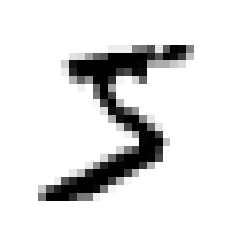

In [7]:
import matplotlib as mp
plt.imshow(X[0].reshape(28,28),cmap=mp.cm.binary,interpolation='nearest')
plt.axis("off");

In [5]:
def plot_digit(data):
    some_digit = data.reshape(28,28)
    plt.imshow(some_digit,mp.cm.binary,interpolation='nearest')
    plt.axis("off")

(1, 28, 84)
(28, 84)


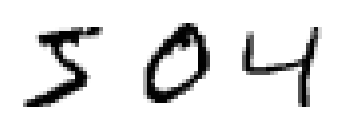

In [8]:
insts = X[:3]
row_images = []
images = [inst.reshape(28,28) for inst in insts]
# rimages = images[0:3]
row_images.append(np.concatenate(images,axis=1))
print(np.array(row_images).shape)
image = np.concatenate(row_images,axis=0)
print(image.shape)
plt.imshow(image,cmap=mp.cm.binary)
plt.axis('off');

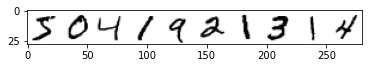

In [9]:
n_img = X[:10]
image = []
for i in range(len(n_img)):
    image.append(n_img[i].reshape(28,28))
image = np.concatenate(image,axis=1)
plt.imshow(image,mp.cm.binary)

In [10]:
def plot_digits(instances,images_per_row):
    image = [inst.reshape(28,28) for inst in instances]
    r_images = []
    n_rows = (len(instances) - 1)//images_per_row + 1
    rem = images_per_row - (len(instances) % images_per_row)
    image.append(np.zeros((28,28*rem)))
    for i in range(n_rows):
        images = image[i*images_per_row:(i+1)*images_per_row]
        r_images.append(np.concatenate(images,axis=1))
    fin_image = np.concatenate(r_images,axis=0)
    plt.imshow(fin_image,mp.cm.binary)

In [11]:
test = []
for i in range(2):
    test.append(np.zeros((5,5)))
test

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])]

(-0.5, 279.5, 251.5, -0.5)

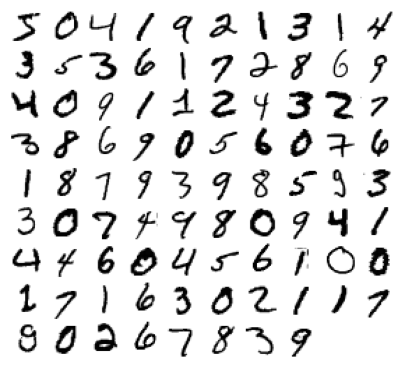

In [12]:
plt.figure(figsize=(7,7))
plot_digits(X[:88],10)
plt.axis('off')

# Let us train only the first 5000 images

In [13]:
#Assign the first 5000 images to X
X_5k = X[:5000]
y_5k = y[:5000]

In [14]:
X_5k.shape, y_5k.shape

((5000, 784), (5000,))

In [15]:
# Split into Training & Test set
from sklearn.model_selection import train_test_split
X_5k_train, X_5k_test, y_5k_train, y_5k_test = train_test_split(X_5k, y_5k, test_size=0.2, random_state=42)

In [16]:
#Find the best algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(n_neighbors=5),
          "Random Forest": RandomForestClassifier(),
          "Support vector": SVC(kernel="rbf")}

model_score = {}

for model_name, model in models.items():
    model.fit(X_5k_train, y_5k_train)
    model_score[model_name] = model.score(X_5k_test,y_5k_test)

model_score

C:\Users\mail2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.881,
 'KNN': 0.941,
 'Random Forest': 0.935,
 'Support vector': 0.947}

In [17]:
# Cross validation on support Random forest
from sklearn.model_selection import cross_val_score
rand_clas = RandomForestClassifier(n_estimators = 150)

cv_new_param = cross_val_score(estimator = rand_clas,
                     X = X_5k,
                     y = y_5k,
                     cv = 5,
                     verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.5s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s finished


In [18]:
# print(cv)
# print(np.mean(cv))
print('\n')
print(cv_new_param)
print(np.mean(cv_new_param))



[0.937 0.941 0.932 0.944 0.92 ]
0.9348000000000001


In [19]:
# cross validating Support vector
sv_clas = SVC(kernel='rbf',C=2.0)

cv_sv = cross_val_score(estimator = sv_clas,
                        X = X_5k,
                        y = y_5k,
                        cv = 5,
                        verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   8.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] ................................................. , total=   8.0s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] ................................................. , total=   7.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.1s finished


In [20]:
print(cv_sv)
print(np.mean(cv_sv))

[0.946 0.948 0.95  0.961 0.953]
0.9516


In [25]:
# cross validate KNN
kn_clas = KNeighborsClassifier(n_neighbors=5)

cv_kn = cross_val_score(estimator = kn_clas,
                        X = X_5k,
                        y = y_5k,
                        cv = 5,
                        verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  14.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] ................................................. , total=  14.1s
[CV]  ................................................................
[CV] ................................................. , total=  14.1s
[CV]  ................................................................
[CV] ................................................. , total=  14.2s
[CV]  ................................................................
[CV] ................................................. , total=  14.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [26]:
cv_kn

array([0.918, 0.935, 0.932, 0.933, 0.92 ])

In [28]:
sv_clas.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
# It appears Support vector is good. Let us do a grid search to find out best hyperparameters in support vector & Random forest

from sklearn.model_selection import GridSearchCV

grid_sv = {"C": np.linspace(0.1,2,3),
           "decision_function_shape": ['ovr','ovo'],
           "gamma": ['scale','auto'],
           "kernel": ['rbf','poly']}

grid_sv_clas = GridSearchCV(estimator = SVC(),
                            param_grid = grid_sv,
                            cv = 5,
                            verbose = 2)

grid_sv_clas.fit(X_5k_train,y_5k_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=  25.3s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=  18.7s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=  11.9s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=  11.8s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=  11.6s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly, total=  10.2s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly, total=  10.5s
[CV] C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=scale, kernel=poly, total=  10.6s
[CV]

[CV]  C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly, total=   4.3s
[CV] C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly, total=   4.4s
[CV] C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly, total=   4.4s
[CV] C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly, total=   4.4s
[CV] C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1.05, decision_function_shape=ovr, gamma=auto, kernel=poly, total=   4.3s
[CV] C=1.05, decision_function_shape=ovo, gamma=scale, kernel=rbf ....
[CV]  C=1.05, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   5.9s
[CV] C=1.05, decision_function_shape=ovo, gamma=scale, kernel=rbf ....
[CV]  C=1.05, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   5.9s


[CV]  C=2.0, decision_function_shape=ovo, gamma=scale, kernel=poly, total=   5.0s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=  22.5s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=  22.4s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=  22.5s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=  22.5s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf ......
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=rbf, total=  22.4s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=poly .....
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=poly, total=   4.4s
[CV] C=2.0,

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 21.2min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1 , 1.05, 2.  ]),
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [37]:
grid_sv_clas.best_params_

{'C': 2.0, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}

In [40]:
rand_clas.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.model_selection import GridSearchCV

grid_rf = {"criterion": ['gini','entropy'],
           "max_features": ['auto','sqrt','log2'],
           "n_estimators": [30,50,100,150]}

grid_rf_clas = GridSearchCV(estimator = RandomForestClassifier(),
                            param_grid = grid_rf,
                            cv = 5,
                            verbose = 2)

grid_rf_clas.fit(X_5k_train,y_5k_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_features=auto, n_estimators=30 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=auto, n_estimators=30, total=   1.4s
[CV] criterion=gini, max_features=auto, n_estimators=30 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=30, total=   0.8s
[CV] criterion=gini, max_features=auto, n_estimators=30 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=30, total=   0.8s
[CV] criterion=gini, max_features=auto, n_estimators=30 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=30, total=   0.8s
[CV] criterion=gini, max_features=auto, n_estimators=30 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=30, total=   0.8s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   1.4s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   1.4s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=   1.3s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............

[CV]  criterion=gini, max_features=log2, n_estimators=150, total=   2.0s
[CV] criterion=entropy, max_features=auto, n_estimators=30 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=30, total=   1.4s
[CV] criterion=entropy, max_features=auto, n_estimators=30 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=30, total=   1.4s
[CV] criterion=entropy, max_features=auto, n_estimators=30 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=30, total=   1.4s
[CV] criterion=entropy, max_features=auto, n_estimators=30 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=30, total=   1.3s
[CV] criterion=entropy, max_features=auto, n_estimators=30 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=30, total=   1.3s
[CV] criterion=entropy, max_features=auto, n_estimators=50 ...........
[CV]  criterion=entropy, max_features=auto, n_estimators=50, total=   2.2s
[CV] criterion=entropy, max_features=auto, n_estima

[CV]  criterion=entropy, max_features=log2, n_estimators=150, total=   3.1s
[CV] criterion=entropy, max_features=log2, n_estimators=150 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=150, total=   3.0s
[CV] criterion=entropy, max_features=log2, n_estimators=150 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=150, total=   3.1s
[CV] criterion=entropy, max_features=log2, n_estimators=150 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=150, total=   3.1s
[CV] criterion=entropy, max_features=log2, n_estimators=150 ..........
[CV]  criterion=entropy, max_features=log2, n_estimators=150, total=   3.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 100, 150]},
             verbose=2)

In [43]:
grid_rf_clas.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}

# Support vector turned out to be the best.
# Let us try a binary classification 5 & not-5 and plot ROC curve.

In [34]:
y_5k_five = (y_5k == '5')

4566

In [35]:
y_5k_five

array([ True, False, False, ..., False, False, False])

In [36]:
#Split train & test
from sklearn.model_selection import train_test_split
X_5k_five_train, X_5k_five_test, y_5k_five_train, y_5k_five_test = train_test_split(X_5k, y_5k_five, test_size=0.2, random_state=42)

In [38]:
#let us quickly check the score for couple of models and determine the best
model_bin_score = {}
for model_name, model in models.items():
    model.fit(X_5k_five_train, y_5k_five_train)
    model_bin_score[model_name] = model.score(X_5k_five_test, y_5k_five_test)

model_bin_score

C:\Users\mail2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.951,
 'KNN': 0.989,
 'Random Forest': 0.982,
 'Support vector': 0.989}

In [43]:
# Let us choose Support vector and move forward.
from sklearn.svm import SVC

sv_bin_clas = SVC(C=2.0, kernel='rbf')
sv_bin_clas.fit(X_5k_five_train, y_5k_five_train)

sv_bin_clas.predict([X[5]])

array([False])

In [254]:
y_5k_five_pred = sv_bin_clas.predict(X_5k_five_test)

(-0.5, 279.5, 111.5, -0.5)

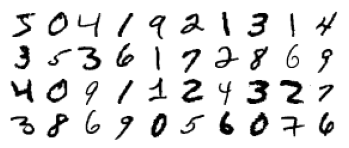

In [13]:
plot_digits(X[:40],10)
plt.axis('off')

In [173]:
# cross val predict
from sklearn.model_selection import cross_val_predict

cv_pred = cross_val_predict(estimator = sv_bin_clas,
                            X = X_5k_five_train,
                            y = y_5k_five_train,
                            cv = 3,
                            method = "decision_function")

In [174]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_5k_five_train, cv_pred)

In [194]:
def plot_precision_recall_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--",label='Precision',linewidth=2)
    plt.plot(threshold, recall[:-1], "g-",label='Recall',linewidth=2)
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel('Threshold',fontsize=16)
    plt.grid(True)
    plt.axis([-1.18, 1.9, 0, 1])

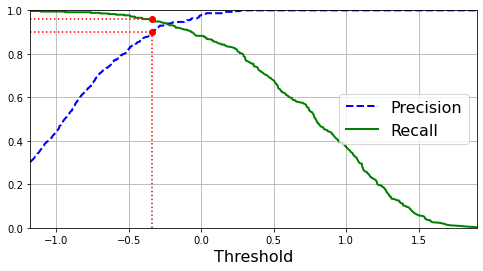

In [195]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8,4))
plot_precision_recall_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1.18, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1.18, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

In [196]:
recall_90_precision

0.96

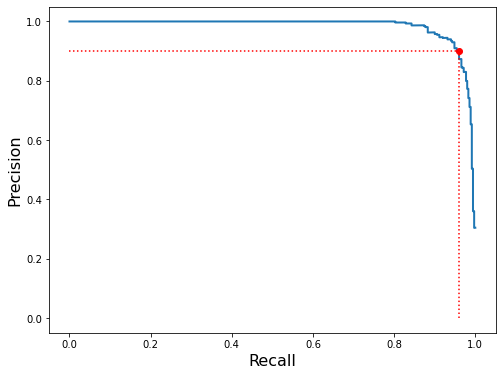

In [215]:
# Precision Recall plot
def precision_recall_plot(precision,recall):
    plt.plot(recall,precision,linewidth=2)
    plt.xlabel('Recall',fontsize=16)
    plt.ylabel('Precision',fontsize=16)

plt.figure(figsize=(8,6))
precision_recall_plot(precisions,recall)
plt.plot([recall_90_precision,recall_90_precision],[0,0.9],"r:")
plt.plot([0.0,recall_90_precision],[0.9,0.9],"r:")
plt.plot(recall_90_precision,0.9,"ro")

# ROC Curves

In [217]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_5k_five_train, cv_pred)

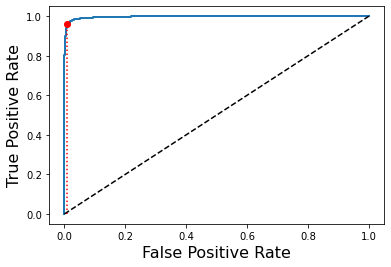

In [252]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    
plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0,recall_90_precision],"r:")
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr_90],[recall_90_precision],"ro")
plt.show()

In [249]:
from sklearn.metrics import roc_auc_score

auc_sv_bin = roc_auc_score(y_5k_five_train, cv_pred)

In [250]:
auc_sv_bin

0.997362035225049

In [255]:
# Let us plot a confusion matrix
from sklearn.metrics import confusion_matrix

cm_sv_bin_clas = confusion_matrix(y_5k_five_test, y_5k_five_pred)
cm_sv_bin_clas

array([[916,   0],
       [  7,  77]], dtype=int64)

In [257]:
np.argmax(y_5k_five_test != y_5k_five_pred)

68

In [262]:
# Try to get the index of false positives so that we can look at the images
arg_fps = [arg for arg in range(len(y_5k_five_test)) if y_5k_five_test[arg]!=y_5k_five_pred[arg]]
arg_fps
# for i in range(len(y_5k_five_test)):

[68, 147, 175, 192, 300, 552, 879]

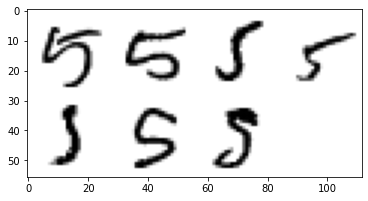

In [269]:
plot_digits(X_5k_five_test[arg_fps],4)

# Now let us do a multiclassification on the whole training set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train using SVC
from sklearn.svm import SVC

sv_mclas = SVC(kernel='rbf',C=2.0)
sv_mclas.fit(X_train, y_train)

SVC(C=2.0)

In [16]:
y_pred = sv_mclas.predict(X_test)

In [17]:
y_pred.shape

(14000,)

In [18]:
y_train_pred = sv_mclas.predict(X_train)

In [19]:
# let us look at the confusion matrix
from sklearn.metrics import confusion_matrix

cm_sv_mclas = confusion_matrix(y_train, y_train_pred)
cm_sv_mclas

array([[5552,    0,    0,    0,    2,    0,    3,    0,    0,    3],
       [   1, 6262,    6,    0,    0,    0,    0,    6,    1,    1],
       [   1,    2, 5594,    0,    3,    0,    1,    7,    1,    1],
       [   0,    2,    5, 5676,    0,    7,    0,    7,    7,    4],
       [   0,    4,    0,    0, 5505,    0,    5,    2,    1,   12],
       [   1,    1,    0,    4,    1, 5023,    6,    0,    1,    3],
       [   3,    2,    0,    0,    2,    2, 5470,    0,    1,    0],
       [   1,   10,    6,    1,    8,    0,    1, 5751,    1,   11],
       [   0,    3,    4,    3,    1,    4,    1,    1, 5449,    2],
       [   2,    2,    0,    5,   19,    2,    0,   14,    3, 5491]],
      dtype=int64)

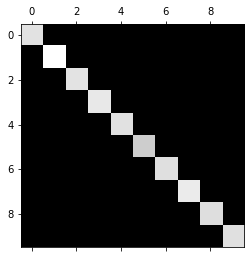

In [20]:
# Let us visualize the confusion matrix using matshow
plt.matshow(cm_sv_mclas,cmap=plt.cm.gray)

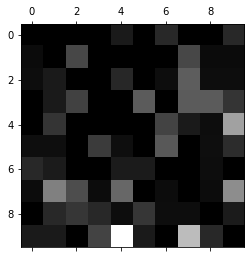

In [21]:
row_sums = cm_sv_mclas.sum(axis=1,keepdims=True)
norm_cm = cm_sv_mclas / row_sums
np.fill_diagonal(norm_cm,0)
plt.matshow(norm_cm, cmap = plt.cm.gray)

In [60]:
cl_a, cl_b = '9', '7'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

In [61]:
X_aa.shape, X_ab.shape, X_bb.shape, X_ba.shape

((5491, 784), (14, 784), (5751, 784), (11, 784))

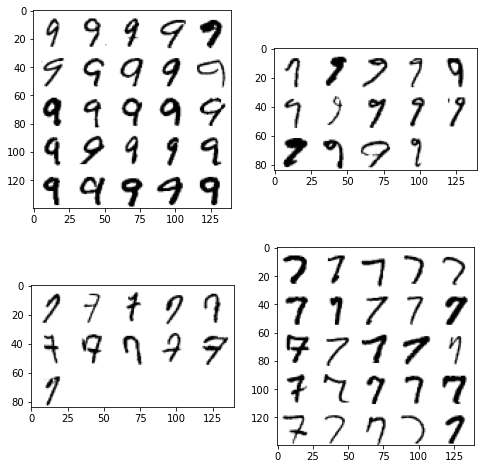

In [62]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],5)
plt.subplot(222); plot_digits(X_ab[:19],5)
plt.subplot(223); plot_digits(X_ba[:12],5)
plt.subplot(224); plot_digits(X_bb[:25],5)

In [75]:
# Confusion matrix for the test dataset
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

test_cm = confusion_matrix(y_test, y_pred)
test_clr = classification_report(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)

print(test_cm)
print('\n')
print(test_clr)
print('\n')
print("Accuracy Score: {:.2f}%".format(test_acc*100))

[[1329    1    5    0    1    0    2    1    4    0]
 [   0 1589    3    2    1    0    0    4    0    1]
 [   3    2 1354    4    2    1    2    7    4    1]
 [   0    1   10 1393    3    8    0    8    7    3]
 [   1    0    3    0 1275    0    1    2    1   12]
 [   0    1    0   13    1 1245    8    0    5    0]
 [   2    0    0    0    5    4 1383    0    2    0]
 [   1    7   12    0    5    1    0 1469    1    7]
 [   2    5    9   10    1    5    5    4 1310    6]
 [   6    7    1    6   10    1    0   10    5 1374]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.98      1380
           3       0.98      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.98 